# General Social Survey
### Divorce-related variable exploration

This notebook look at the [General Social Survey](https://gss.norc.org/) (GSS), exploring divorce-related variables over the 50+ years of survey data. The primary data file for this exploration (gss7221_r2.dta) can be found in the [GSS Strata archive](https://gss.norc.org/documents/stata/GSS_stata.zip). If you want to work with this data for your own analysis, it is also essential to review the survey [codebooks](https://gss.norc.org/Get-Documentation).

Special thanks to [Allen Downey](https://github.com/AllenDowney) for all the work they have published on crafting jupyter notebooks with GSS data.

This notebook is part of the [GeneralSocialSurvey](https://github.com/CulleyHarrelson/GeneralSocialSurvey) github repository.

Table of Context
- [Marital](#marital): Are you currently married, widowed, divorced, separated, or have you never been married?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#import convenience function, column selection and data clensing functions
import gss_functions


In [2]:
# load the data
# extract this file from: https://gss.norc.org/documents/stata/GSS_stata.zip
gss = pd.read_stata('gss7221_r2.dta', columns=gss_functions.columns(), convert_categoricals=False)
gss_functions.gss_replace_invalid(gss)


In [3]:
    # some columns have no missing values
    clean_columns = ["id", "year", "ballot", "sex", "race", "reg16", "region", "srcbelt"]

    for column in gss.columns:
        if gss[column].dtype == int and column not in clean_columns:
            print(f"'{column}', ", end="")
    print()

## Variable: marital <a name="marital"></a>

This variable tracks responses to the following question:

> Are you currently married, widowed, divorced, separated, or have you never been married?

[codebook documentation](https://gss.norc.org/Documents/codebook/GSS%202021%20Codebook.pdf#page=95)

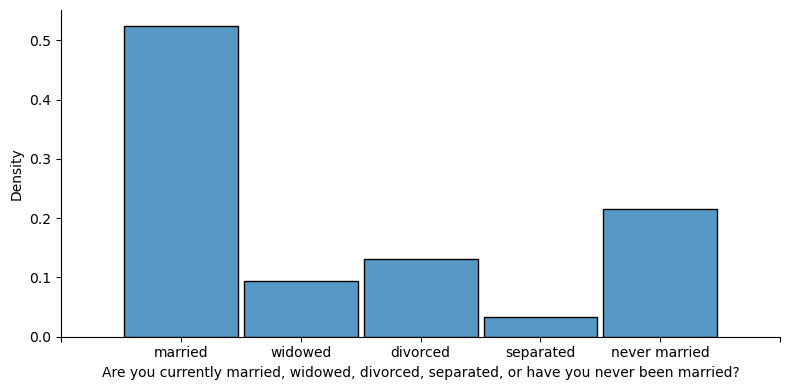

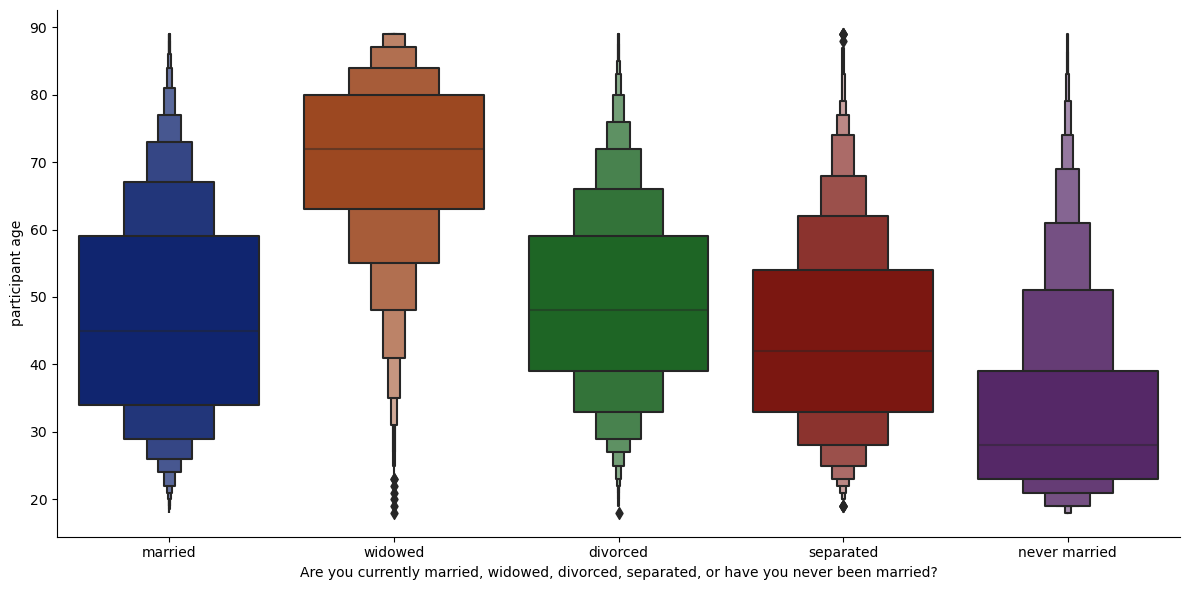

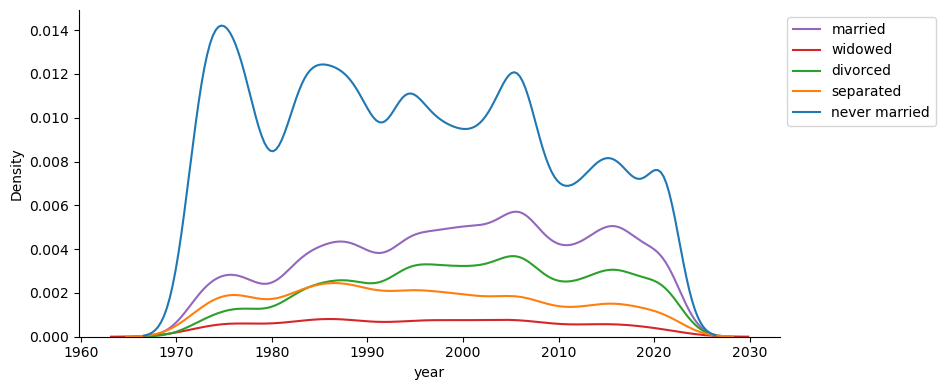

In [4]:

t = "Are you currently married, widowed, divorced, separated, or have you never been married?"


spaced_labels = ['', 
          'married',
          'widowed',
          'divorced',
          'separated',
          'never married', 
          '']

p = sns.displot(
    data=gss, 
    kind="hist",
    x="marital",
    #hue="sex", 
    multiple="stack", 
    #palette='dark',
    discrete=True, 
    height=4,
    aspect=2, 
    legend=False,
    shrink=.95,
    stat="density", 
    common_norm=False
)
p.set_xticklabels(spaced_labels)
p.set_xlabels(t)
plt.draw()
warnings.filterwarnings("ignore")

labels = ['married',
          'widowed',
          'divorced',
          'separated',
          'never married']

h = sns.catplot(
    data=gss, 
    x="marital", 
    y="age", 
    palette='dark',
    kind="boxen",
    height=6,
    aspect=2, 
)

h.set_xticklabels(labels)
h.set_xlabels(t)
h.set_ylabels('participant age')
plt.draw()


by_year = sns.displot(
    gss, 
    x="year", 
    hue="marital", 
    palette='tab10',
    kind="kde",
    height=4,
    aspect=2,
    legend=False,
)

plt.legend(labels=labels, loc = 2, bbox_to_anchor = (1,1))
plt.draw()


# Variable: famdif16

(at age 16) If not living with bother own mother and father: What happened?

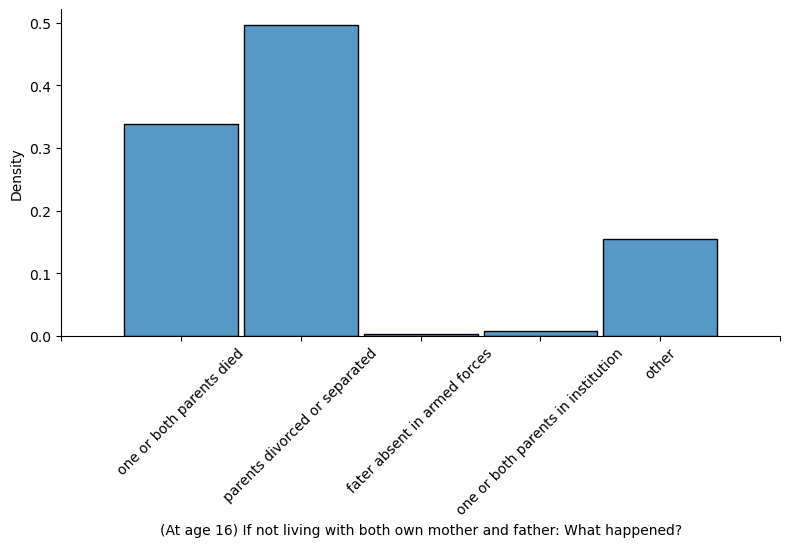

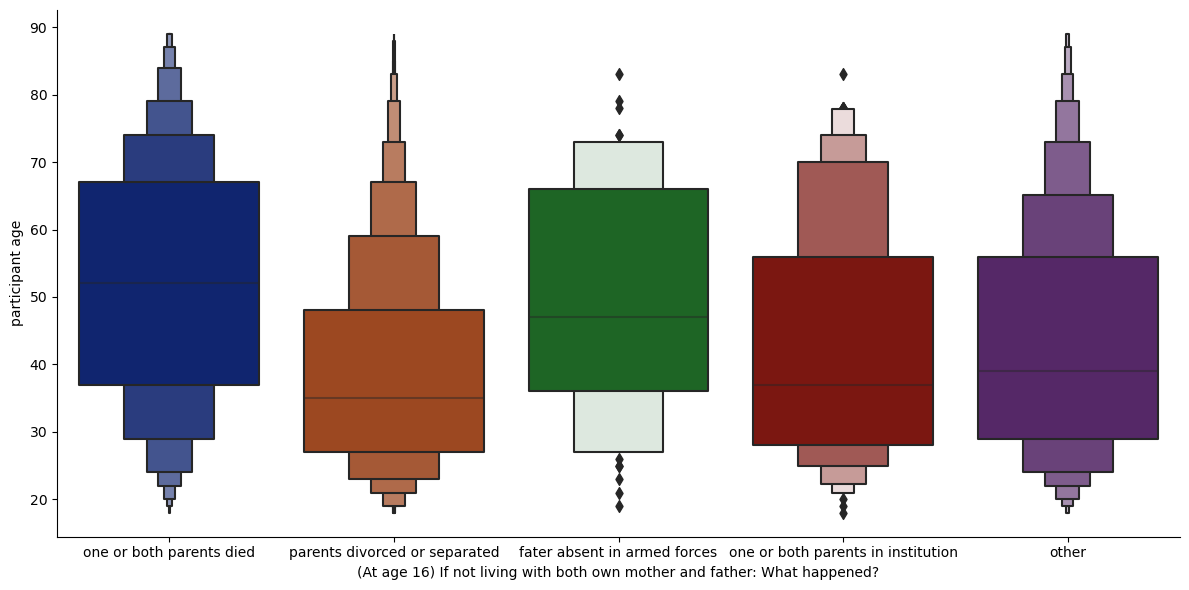

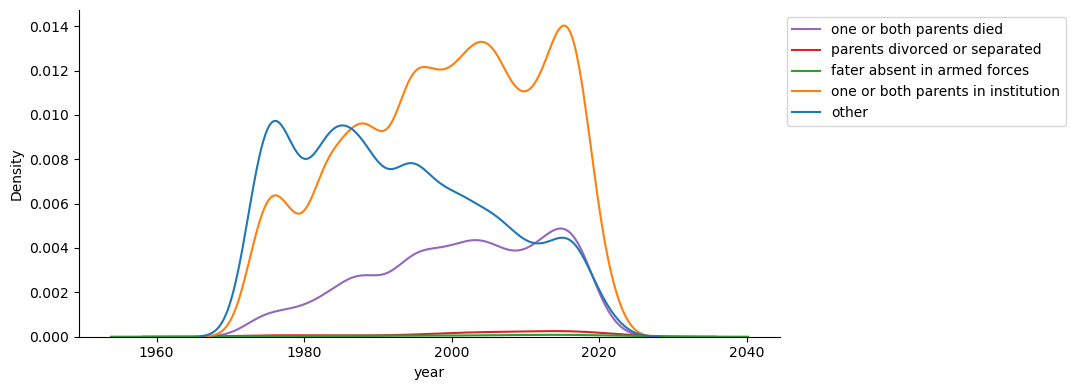

In [5]:

spaced_labels = ['', 'one or both parents died',
          'parents divorced or separated',
          'fater absent in armed forces',
          'one or both parents in institution',
          'other', '']

t = "(At age 16) If not living with both own mother and father: What happened?"

p = sns.displot(
    data=gss, 
    kind="hist",
    x="famdif16",
    multiple="stack", 
    discrete=True, 
    height=4,
    aspect=2, 
    legend=False,
    shrink=.95,
    stat="density", 
    common_norm=False
)
p.set_xticklabels(spaced_labels)
plt.xticks(rotation=45)
p.set_xlabels(t)
plt.draw()

labels2 = ['one or both parents died',
          'parents divorced or separated',
          'fater absent in armed forces',
          'one or both parents in institution',
          'other']

h = sns.catplot(
    data=gss, 
    x="famdif16", 
    y="age", 
    palette='dark',
    kind="boxen",
    height=6,
    aspect=2, 
)

h.set_xticklabels(labels2)
h.set_xlabels(t)
h.set_ylabels('participant age')
plt.draw()

by_year = sns.displot(
    gss, 
    x="year", 
    hue="famdif16", 
    palette='tab10',
    kind="kde",
    height=4,
    aspect=2,
    legend=False,
)

plt.legend(labels=labels2, loc = 2, bbox_to_anchor = (1,1))
plt.draw()


# Variable: divorce

**Survey Prompt:** If currently married or widowed: Have you ever been divorced or legally separated?

[codebook documentation](https://gss.norc.org/Documents/codebook/GSS%202021%20Codebook.pdf#page=96)



['very happy', 'pretty happy', 'not too happy']


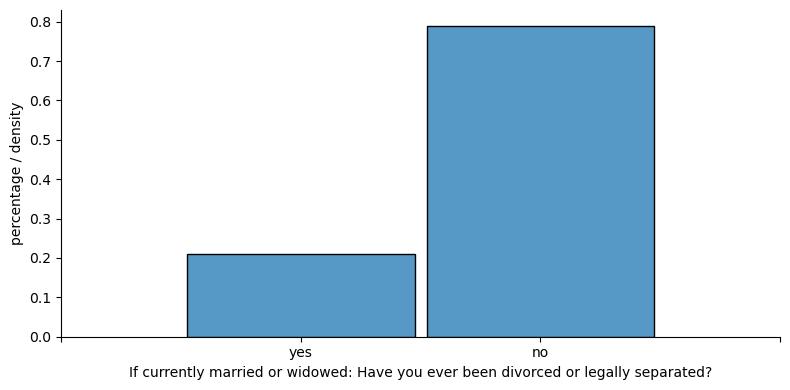

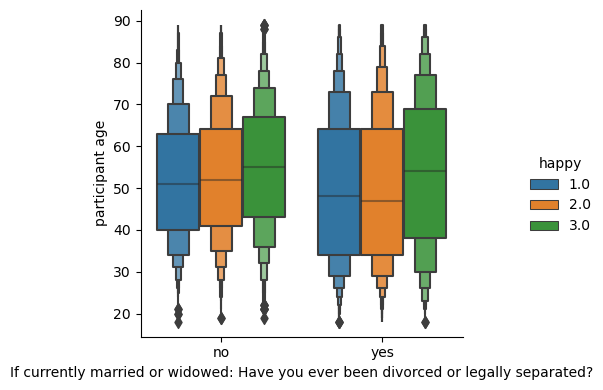

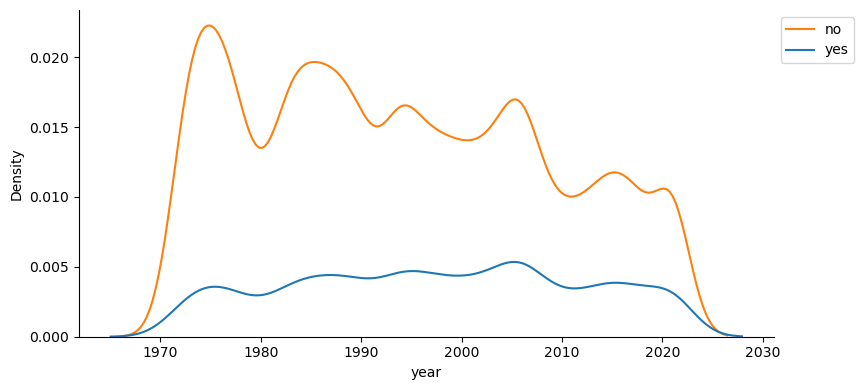

In [6]:

p = sns.displot(
    data=gss, 
    x="divorce", 
    kind="hist", 
    palette="dark",
    height=4,
    aspect=2, 
    legend=False,
    stat="density", 
    common_norm=False,
    discrete=True, 
    shrink=.95,
)
labels = ['yes',
          'no']

t = "If currently married or widowed: Have you ever been divorced or legally separated?"
plt.xticks(range(4))
p.set_xticklabels(['', 'yes', 'no', ''])
p.set_xlabels(t)
p.set_ylabels('percentage / density')
warnings.filterwarnings("ignore")
plt.draw()

h = sns.catplot(
    data=gss, 
    x="divorce", 
    y="age", 
    hue='happy',
    palette='tab10',
    kind="boxen",
    legend=True,
    height=4,
    aspect=1, 
)

happy_labels=['very happy', 'pretty happy', 'not too happy']

print(happy_labels)

#plt.legend(title='Happy', labels=happy_labels)

h.set_xticklabels(['no', 'yes'])
h.set_xlabels(t)
#h.add_legend(legend_data=happy_labels)
#plt.legend(labels=['no', 'yes'], loc = 2, bbox_to_anchor = (1,1))
#plt.legend(labels=['very hapy', 'pretty happy', 'not too happy'], loc = 2, bbox_to_anchor = (1,1))
h.set_ylabels('participant age')
plt.draw()

by_year = sns.displot(
    gss, 
    x="year", 
    hue="divorce", 
    palette='tab10',
    kind="kde",
    height=4,
    aspect=2,
    legend=False,
)

plt.legend(labels=['no', 'yes'], loc = 2, bbox_to_anchor = (1,1))
plt.draw()


# Variable: divlaw

Should divorce in this country be easier or more obtain than it is now?


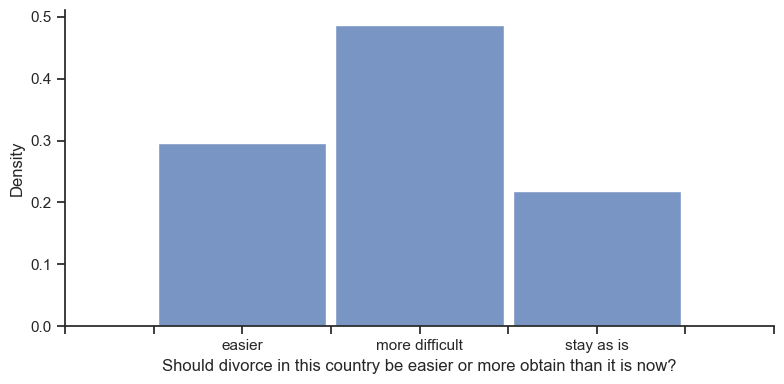

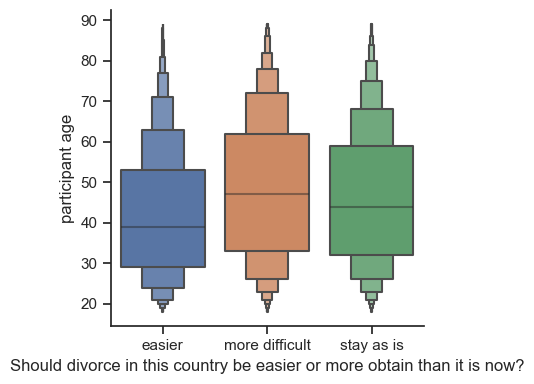

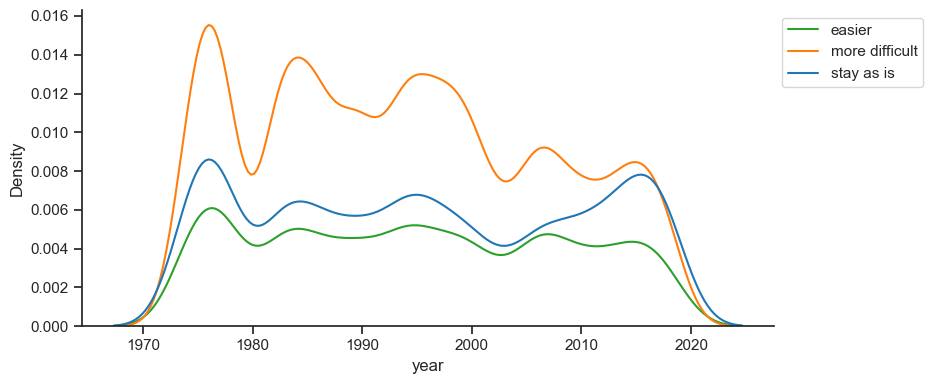

In [8]:
sns.set_theme()
sns.set_style("ticks")


labels = ['easier',
          'more difficult',
          'stay as is']

t = "Should divorce in this country be easier or more obtain than it is now?"

warnings.filterwarnings("ignore")


spaced_labels = ['', '', 'easier', '',
          'more difficult', '',
          'stay as is', '', '']

p = sns.displot(
    data=gss, 
    x="divlaw", 
    kind="hist", 
    palette="dark",
    height=4,
    aspect=2, 
    legend=False,
    stat="density", 
    common_norm=False,
    discrete=True, 
    shrink=.95,
)

p.set_xticklabels(spaced_labels)
p.set_xlabels(t)
plt.draw()

h = sns.catplot(
    data=gss, 
    x="divlaw", 
    y="age", 
    kind="boxen",
    height=4,
    aspect=1, 
)

h.set_xticklabels(labels)
h.set_xlabels(t)
h.set_ylabels('participant age')
plt.draw()


by_year = sns.displot(
    gss, 
    x="year", 
    hue="divlaw", 
    palette='tab10',
    kind="kde",
    height=4,
    aspect=2,
    legend=False,
)

plt.legend(labels=labels, loc = 2, bbox_to_anchor = (1,1))
plt.draw()